In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
vocab_size=10000
maxlen=200
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step


In [3]:
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

In [4]:
model=keras.Sequential([
    layers.Embedding(input_dim=vocab_size,output_dim=32,input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])


C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Embedding layer: Converts integer tokens to dense vectors of size 
32. • GlobalAveragePooling1D: Averages the embedding vectors to  f
 ixed-size vector.

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,epochs=10,batch_size=512,validation_split=0.2,verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5758 - loss: 0.6895 - val_accuracy: 0.7350 - val_loss: 0.6617
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7323 - loss: 0.6434 - val_accuracy: 0.7794 - val_loss: 0.5606
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8003 - loss: 0.5269 - val_accuracy: 0.8320 - val_loss: 0.4427
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8426 - loss: 0.4109 - val_accuracy: 0.8472 - val_loss: 0.3773
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8679 - loss: 0.3424 - val_accuracy: 0.8626 - val_loss: 0.3405
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8865 - loss: 0.2988 - val_accuracy: 0.8688 - val_loss: 0.3183
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8975 - loss: 0.2677 - val_accuracy: 0.8724 - val_loss: 0.3074
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9089 - loss: 0.2401 - val_accuracy: 0.8758 - v

• Train for 100 epochs. 
• 512 samples per batch. 
• Use 20% of training data as validation. 
• verbose=1 shows training progress. 

In [7]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=1)
print(f"test accuracy:{accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8673 - loss: 0.3082
test accuracy:0.8657


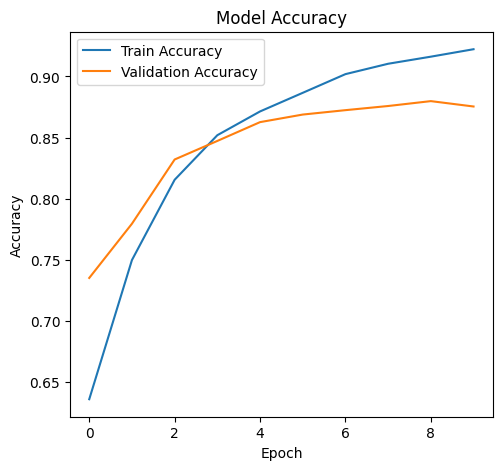

In [8]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

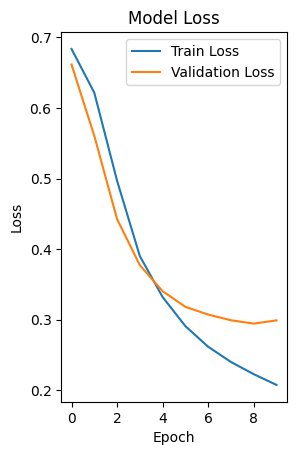

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [10]:
y_pred_probs=model.predict(x_test[:10])
y_pred_classes=(y_pred_probs > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [11]:
for i in range(10):
    print(f"Review {i+1} - predict: {'positive' if y_pred_classes[i][0]==1 else 'Negative'},Actual: {'Positive' if y_test[i]==1 else 'Negative'}")

Review 1 - predict: Negative,Actual: Negative
Review 2 - predict: positive,Actual: Positive
Review 3 - predict: positive,Actual: Positive
Review 4 - predict: Negative,Actual: Negative
Review 5 - predict: positive,Actual: Positive
Review 6 - predict: positive,Actual: Positive
Review 7 - predict: positive,Actual: Positive
Review 8 - predict: Negative,Actual: Negative
Review 9 - predict: positive,Actual: Negative
Review 10 - predict: positive,Actual: Positive
